Fluxo de dados binários: [0 1 0 0 0 1 0 0 0 1]
Frequência central: 400 Hz
Frequência de amostragem: 12800 Hz (32.0x portadora)
Amostras por bit: 40
Parâmetros FSK não coerente:
  - Índice de modulação: 2
  - Separação de frequência: 640.00 Hz
  - Frequência para bit '1': 720.00 Hz
  - Frequência para bit '0': 80.00 Hz
Parâmetros FSK coerente:
  - Índice de modulação: 2
  - Separação de frequência: 640.00 Hz
  - Frequência para bit '1': 720.00 Hz
  - Frequência para bit '0': 80.00 Hz
  - Fase inicial: 5.4423 radianos
Plotando...


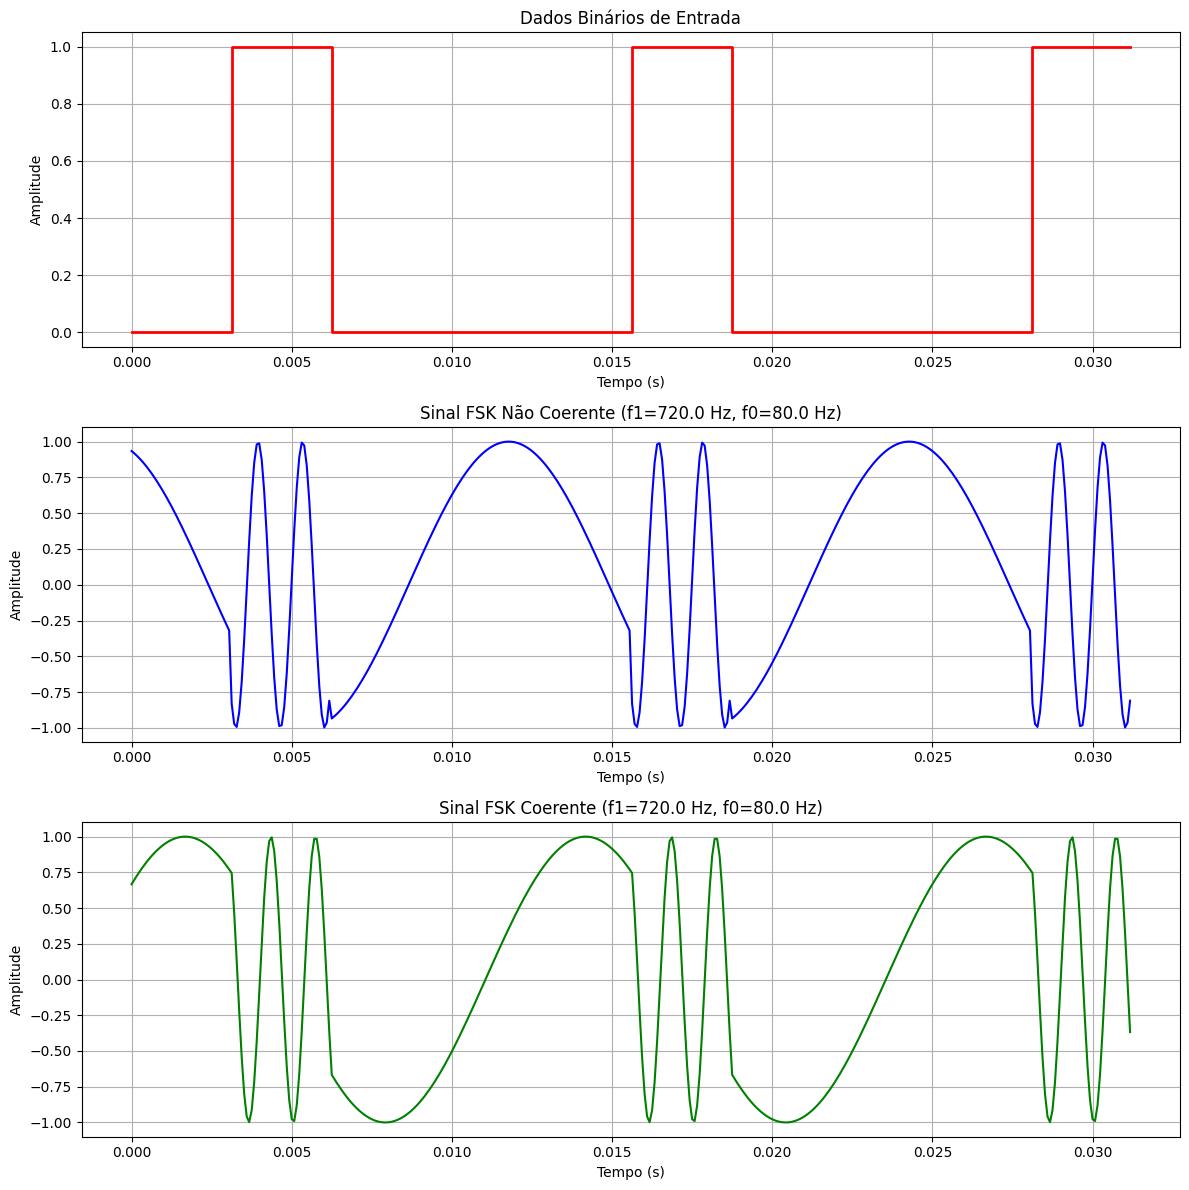

In [4]:
import numpy as np #para computação numérica
import matplotlib.pyplot as plt #para funções de plotagem
from scipy.signal import upfirdn

def bfsk_mod(a, fc, fd1, fd2, L, fs):
    """
    Função para modular um fluxo binário de entrada usando BFSK coerente e não coerente

    Parâmetros:
    a : fluxo de dados binários de entrada (0s e 1s) para modular
    fc : frequência central da portadora em Hertz
    fd1 : separação de frequência para FSK não coerente
    fd2 : separação de frequência para FSK coerente
    L : número de amostras em 1 período de bit
    fs : frequência de amostragem para simulação em tempo discreto

    Retorna:
    s_t : sinal modulado FSK não coerente
    s_t1 : sinal modulado FSK coerente
    phase : fase inicial usada na modulação coerente
    a_t : fluxo de dados binários superamostrado
    t : vetor de tempo
    """
    a_t = upfirdn(h=[1]*L, x=a, up=L)  # dados para forma de onda
    t = np.arange(start=0, stop=len(a_t))/fs  # base de tempo

    # Modulação BFSK não coerente
    # portadora 1 com fase aleatória
    c11 = np.cos(2*np.pi*(fc+fd1/2)*t+2*np.pi*np.random.random_sample())
    # portadora 2 com fase aleatória
    c21 = np.cos(2*np.pi*(fc-fd1/2)*t+2*np.pi*np.random.random_sample())

    # Modulação BFSK coerente
    # fase aleatória de distribuição uniforme [0,2pi)
    phase = 2*np.pi*np.random.random_sample()
    c12 = np.cos(2*np.pi*(fc+fd2/2)*t+phase)  # portadora 1 com fase aleatória
    c22 = np.cos(2*np.pi*(fc-fd2/2)*t+phase)  # portadora 2 com a mesma fase aleatória

    s_t = a_t*c11 + (-a_t+1)*c21  # sinal BFSK não coerente
    s_t1 = a_t*c12 + (-a_t+1)*c22  # sinal BFSK coerente

    return (s_t, s_t1, phase, a_t, t)

# Parâmetros de modulação
fc = 400  # frequência central da portadora f_c - múltiplo integral de 1/Tb
h1 = 2    # índice de modulação deve ser no mínimo 1 para FSK não coerente ou múltiplos de 1
h2 = 2    # índice de modulação deve ser no mínimo 0.5 para FSK coerente ou múltiplos de 0.5
L = 40    # fator de superamostragem
fs = 32*fc  # frequência de amostragem aumentada para ondas senoidais mais suaves (era 8*fc)
fd1 = h1/(L/fs)  # separação de frequência para não coerente
fd2 = h2/(L/fs)  # separação de frequência para coerente

np.random.seed(42)  # para reprodutibilidade
a = np.random.randint(2, size=10)  # símbolos aleatórios uniformes de 0s e 1s
[s_t, s_t1, phase, a_t, t] = bfsk_mod(a, fc, fd1, fd2, L, fs)

# Imprimir informações detalhadas sobre a modulação
print("Fluxo de dados binários:", a)
print(f"Frequência central: {fc} Hz")
print(f"Frequência de amostragem: {fs} Hz ({fs/fc}x portadora)")
print(f"Amostras por bit: {L}")
print(f"Parâmetros FSK não coerente:")
print(f"  - Índice de modulação: {h1}")
print(f"  - Separação de frequência: {fd1:.2f} Hz")
print(f"  - Frequência para bit '1': {fc + fd1/2:.2f} Hz")
print(f"  - Frequência para bit '0': {fc - fd1/2:.2f} Hz")
print(f"Parâmetros FSK coerente:")
print(f"  - Índice de modulação: {h2}")
print(f"  - Separação de frequência: {fd2:.2f} Hz")
print(f"  - Frequência para bit '1': {fc + fd2/2:.2f} Hz")
print(f"  - Frequência para bit '0': {fc - fd2/2:.2f} Hz")
print(f"  - Fase inicial: {phase:.4f} radianos")
print("Plotando...")

# Criar figura com subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

# Gráfico 1: Dados binários de entrada (como onda quadrada)
ax1.step(t, a_t, 'r-', where='post', linewidth=2)
ax1.set_title('Dados Binários de Entrada')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Tempo (s)')
ax1.grid(True)

# Gráfico 2: Sinal FSK modulado - não coerente
ax2.plot(t, s_t, 'b-')
ax2.set_title(f'Sinal FSK Não Coerente (f1={fc+fd1/2:.1f} Hz, f0={fc-fd1/2:.1f} Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Tempo (s)')
ax2.grid(True)

# Gráfico 3: Sinal FSK modulado - coerente
ax3.plot(t, s_t1, 'g-')
ax3.set_title(f'Sinal FSK Coerente (f1={fc+fd2/2:.1f} Hz, f0={fc-fd2/2:.1f} Hz)')
ax3.set_ylabel('Amplitude')
ax3.set_xlabel('Tempo (s)')
ax3.grid(True)

# Aplicar tight_layout para melhor espaçamento
plt.tight_layout()

# Exibir ambas as figuras
plt.show()